# Sreeja Katanguri

# Prediction of Stock Price

Source of data : https://finance.yahoo.com/quote/ACN/history?p=ACN

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

## Data prep

In [2]:
dataframe = pd.read_csv('ACN.csv',  parse_dates=True)

In [3]:
dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataframe = dataframe[['Close']]  #our target column

In [5]:
dataframe

,Close
0,316.820007
1,303.100006
2,303.100006
3,313.839996
4,300.359985
...,...
245,279.980011
246,279.959991
247,279.899994
248,275.549988


In [6]:
dataframe['Close'].isna().sum() #checking for null vlaues

0


There are no null values in the target data

In [7]:
row_count = dataframe.shape[0] 
row_count

250

In [8]:
temp = dataframe.to_numpy() 
temp.shape

(250, 1)

In [9]:
sequence_length = 10  

In [10]:
temp = temp[row_count % sequence_length: ]
temp.shape

(250, 1)

In [11]:
temp = temp.reshape(row_count // sequence_length, sequence_length) 
temp

array([[316.820007, 303.100006, 303.100006, 313.839996, 300.359985,
        304.600006, 304.820007, 314.859985, 298.700012, 295.73999 ],
       [287.48999 , 287.589996, 280.940002, 281.209991, 286.769989,
        286.170013, 291.070007, 274.160004, 273.609985, 276.649994],
       [283.390015, 279.309998, 279.640015, 291.549988, 304.149994,
        298.459991, 298.649994, 306.619995, 304.950012, 304.730011],
       [306.529999, 302.640015, 295.429993, 286.01001 , 276.5     ,
        275.119995, 281.190002, 270.899994, 275.380005, 282.730011],
       [286.399994, 285.829987, 299.369995, 292.619995, 283.799988,
        279.809998, 277.649994, 280.649994, 275.170013, 275.940002],
       [279.399994, 279.070007, 274.869995, 273.670013, 272.170013,
        268.670013, 271.519989, 268.649994, 280.040009, 281.660004],
       [288.01001 , 288.01001 , 289.290009, 285.179993, 297.529999,
        303.679993, 306.26001 , 304.73999 , 302.480011, 308.170013],
       [310.609985, 309.350006, 310.32998

In [12]:
# we can now see that our days have been organized into rows of sequence length. 

In [13]:
# Convert to dataframe

new_df = pd.DataFrame(temp, columns=np.arange(0,10,1))

new_df

,0,1,2,3,4,5,6,7,8,9
0,316.820007,303.100006,303.100006,313.839996,300.359985,304.600006,304.820007,314.859985,298.700012,295.739990
1,287.489990,287.589996,280.940002,281.209991,286.769989,286.170013,291.070007,274.160004,273.609985,276.649994
2,283.390015,279.309998,279.640015,291.549988,304.149994,298.459991,298.649994,306.619995,304.950012,304.730011
3,306.529999,302.640015,295.429993,286.010010,276.500000,275.119995,281.190002,270.899994,275.380005,282.730011
4,286.399994,285.829987,299.369995,292.619995,283.799988,279.809998,277.649994,280.649994,275.170013,275.940002
5,279.399994,279.070007,274.869995,273.670013,272.170013,268.670013,271.519989,268.649994,280.040009,281.660004
6,288.010010,288.010010,289.290009,285.179993,297.529999,303.679993,306.260010,304.739990,302.480011,308.170013
7,310.609985,309.350006,310.329987,309.790009,316.480011,314.420013,320.440002,320.329987,320.779999,318.450012
8,319.459991,315.290009,310.000000,306.700012,306.260010,309.769989,298.130005,295.140015,292.500000,288.459991
9,288.790009,284.070007,283.459991,286.760010,287.959991,290.549988,295.260010,281.519989,278.529999,273.859985


# Standazing the data

In [14]:
new_df1 = np.array(new_df).ravel().reshape(-1,1)

new_df1.shape

(250, 1)

In [15]:
new_df1

array([[316.820007],
       [303.100006],
       [303.100006],
       [313.839996],
       [300.359985],
       [304.600006],
       [304.820007],
       [314.859985],
       [298.700012],
       [295.73999 ],
       [287.48999 ],
       [287.589996],
       [280.940002],
       [281.209991],
       [286.769989],
       [286.170013],
       [291.070007],
       [274.160004],
       [273.609985],
       [276.649994],
       [283.390015],
       [279.309998],
       [279.640015],
       [291.549988],
       [304.149994],
       [298.459991],
       [298.649994],
       [306.619995],
       [304.950012],
       [304.730011],
       [306.529999],
       [302.640015],
       [295.429993],
       [286.01001 ],
       [276.5     ],
       [275.119995],
       [281.190002],
       [270.899994],
       [275.380005],
       [282.730011],
       [286.399994],
       [285.829987],
       [299.369995],
       [292.619995],
       [283.799988],
       [279.809998],
       [277.649994],
       [280.6

## Standardize values

In [16]:
# Using StandardScaler to standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_std = scaler.fit_transform(new_df1)

In [17]:
new_reshaped = new_std.reshape(25,10)

new_reshaped.shape

(25, 10)

In [18]:
#Pandas version of the reshaped data

pd.DataFrame(new_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,2.176364,1.323014,1.323014,1.991015,1.152591,1.416310,1.429994,2.054455,1.049345,0.865239
1,0.352109,0.358330,-0.055284,-0.038491,0.307327,0.270010,0.574778,-0.476983,-0.511192,-0.322111
2,0.097101,-0.156666,-0.136140,0.604631,1.388320,1.034416,1.046234,1.541948,1.438080,1.424396
3,1.536351,1.294404,0.845958,0.260058,-0.331441,-0.417274,-0.039734,-0.679747,-0.401102,0.056051
4,0.284314,0.248861,1.091016,0.671183,0.122601,-0.125567,-0.259914,-0.073321,-0.414163,-0.366271
5,-0.151068,-0.171593,-0.432823,-0.507459,-0.600755,-0.818446,-0.641185,-0.819692,-0.111261,-0.010501
6,0.384453,0.384453,0.464066,0.208433,0.976573,1.359088,1.519558,1.425017,1.284452,1.638356
7,1.790116,1.711748,1.772701,1.739115,2.155217,2.027090,2.401519,2.394676,2.422666,2.277746
8,2.340564,2.081202,1.752176,1.546925,1.519558,1.737870,1.013892,0.827922,0.663720,0.412441
9,0.432967,0.139395,0.101454,0.306707,0.381342,0.542434,0.835385,-0.019210,-0.205180,-0.495643


# Data split



In [19]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(new_reshaped,test_size=0.3)


In [20]:
train.shape

(17, 10)

In [21]:
train[:2]

array([[ 0.28431445,  0.24886142,  1.09101638,  0.6711831 ,  0.12260051,
        -0.12556698, -0.25991388, -0.07332131, -0.41416255, -0.36627115],
       [ 0.09710121, -0.15666574, -0.1361395 ,  0.60463132,  1.38832048,
         1.03441639,  1.0462341 ,  1.54194843,  1.43807962,  1.4243961 ]])

In [22]:
test.shape

(8, 10)

In [23]:
test[:2]

array([[ 0.51382343,  0.44043085,  0.67304897,  0.60214479,  0.33034192,
         0.29053457,  0.3228766 ,  0.68797768,  0.78998062,  0.90628968],
       [ 0.37014734,  0.12882064, -0.02231891, -0.58333988, -1.55175575,
        -1.28555041, -0.79356782, -0.79605622, -0.95714762,  0.3228766 ]])

In [24]:
# The first 9 columns (from 0 to 9) are inputs

train_inputs = train[:,:9]

pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,0.284314,0.248861,1.091016,0.671183,0.122601,-0.125567,-0.259914,-0.073321,-0.414163
1,0.097101,-0.156666,-0.136140,0.604631,1.388320,1.034416,1.046234,1.541948,1.438080
2,0.207190,0.132552,0.405600,0.182932,0.362061,-0.037868,-0.297233,-0.788593,-0.758737
3,0.384453,0.384453,0.464066,0.208433,0.976573,1.359088,1.519558,1.425017,1.284452
4,1.790116,1.711748,1.772701,1.739115,2.155217,2.027090,2.401519,2.394676,2.422666
5,-1.796193,-1.898196,-1.825425,-2.217892,-1.798058,-1.979675,-1.821071,-1.505730,-1.776289
6,0.352109,0.358330,-0.055284,-0.038491,0.307327,0.270010,0.574778,-0.476983,-0.511192
7,0.653768,0.840983,0.598413,-0.044088,-1.079054,-1.643809,-1.239525,-0.802897,-1.061639
8,2.176364,1.323014,1.323014,1.991015,1.152591,1.416310,1.429994,2.054455,1.049345
9,0.545545,0.382588,1.188044,1.306219,1.138287,0.678646,0.222740,0.302352,0.641950


In [25]:
train_inputs

array([[ 0.28431445,  0.24886142,  1.09101638,  0.6711831 ,  0.12260051,
        -0.12556698, -0.25991388, -0.07332131, -0.41416255],
       [ 0.09710121, -0.15666574, -0.1361395 ,  0.60463132,  1.38832048,
         1.03441639,  1.0462341 ,  1.54194843,  1.43807962],
       [ 0.20719014,  0.1325523 ,  0.40560036,  0.18293217,  0.36206135,
        -0.03786829, -0.29723277, -0.78859283, -0.75873733],
       [ 0.38445345,  0.38445345,  0.46406622,  0.20843341,  0.97657319,
         1.35908758,  1.51955825,  1.42501677,  1.28445168],
       [ 1.79011592,  1.71174835,  1.77270074,  1.73911544,  2.155217  ,
         2.02709023,  2.40151863,  2.39467597,  2.4226656 ],
       [-1.79619251, -1.89819639, -1.82542541, -2.21789166, -1.79805838,
        -1.97967502, -1.82107115, -1.5057302 , -1.77628887],
       [ 0.3521095 ,  0.35832962, -0.05528353, -0.03849088,  0.30732722,
         0.2700102 ,  0.57477769, -0.47698261, -0.51119243],
       [ 0.65376786,  0.84098303,  0.59841306, -0.04408841, -1

In [26]:
train_inputs.shape 

(17, 9)

In [27]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(17, 9, 1)

In [28]:
train_x

array([[[ 0.28431445],
        [ 0.24886142],
        [ 1.09101638],
        [ 0.6711831 ],
        [ 0.12260051],
        [-0.12556698],
        [-0.25991388],
        [-0.07332131],
        [-0.41416255]],

       [[ 0.09710121],
        [-0.15666574],
        [-0.1361395 ],
        [ 0.60463132],
        [ 1.38832048],
        [ 1.03441639],
        [ 1.0462341 ],
        [ 1.54194843],
        [ 1.43807962]],

       [[ 0.20719014],
        [ 0.1325523 ],
        [ 0.40560036],
        [ 0.18293217],
        [ 0.36206135],
        [-0.03786829],
        [-0.29723277],
        [-0.78859283],
        [-0.75873733]],

       [[ 0.38445345],
        [ 0.38445345],
        [ 0.46406622],
        [ 0.20843341],
        [ 0.97657319],
        [ 1.35908758],
        [ 1.51955825],
        [ 1.42501677],
        [ 1.28445168]],

       [[ 1.79011592],
        [ 1.71174835],
        [ 1.77270074],
        [ 1.73911544],
        [ 2.155217  ],
        [ 2.02709023],
        [ 2.40151863],
   

In [29]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.366271
1,1.424396
2,-0.659221
3,1.638356
4,2.277746
5,-0.632476
6,-0.322111
7,-0.978917
8,0.865239
9,0.409332


In [30]:
test.shape

(8, 10)

In [31]:
test_inputs = test[:,:9]

In [32]:
test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(8, 9, 1)

In [33]:
test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,0.906290
1,0.322877
2,-0.429091
3,0.056051
4,-1.372627
5,-1.465302
6,-0.539180
7,0.179200


In [34]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A Normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 749ms/step - loss: 2.1551
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 2.0673
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.9836
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.9025
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 1.8243
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7489
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.6765
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.6070
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 1.5403
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 1.4762
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 1.4137
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3521
Epoch 13/100
1/1 [==============================] - 0s 6ms

In [36]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 175ms/step


In [37]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [38]:
comparison

,actual,predicted
0,296.399994,288.225677
1,287.019989,262.862274
2,274.929993,276.674347
3,282.730011,267.396698
4,259.760010,271.366638
5,258.269989,266.121552
6,273.160004,275.643158
7,284.709991,285.425781


For the cross section nn the predicted values are closer to actual and are slightly high which can be accepted.

In [39]:
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [40]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Normal NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,136.450894


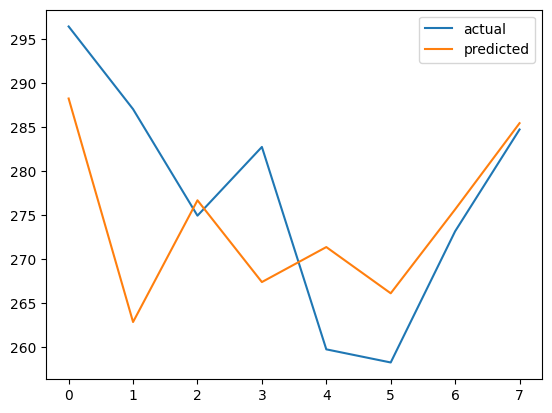

In [41]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN


In [42]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.5033
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1.4078
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 1.3134
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 1.2230
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 1.1383
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0593
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.9840
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9158
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8537
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7968
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7431
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6931
Epoch 13/100
1/1 [==============================] - 0s 7ms

### Predictions

In [44]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 252ms/step


In [45]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [46]:
comparison

,actual,predicted
0,296.399994,289.535889
1,287.019989,270.446533
2,274.929993,275.051422
3,282.730011,272.069183
4,259.760010,271.611359
5,258.269989,266.666687
6,273.160004,277.269928
7,284.709991,286.925385


In [47]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [48]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,136.450894
0,Simple NN,83.527727


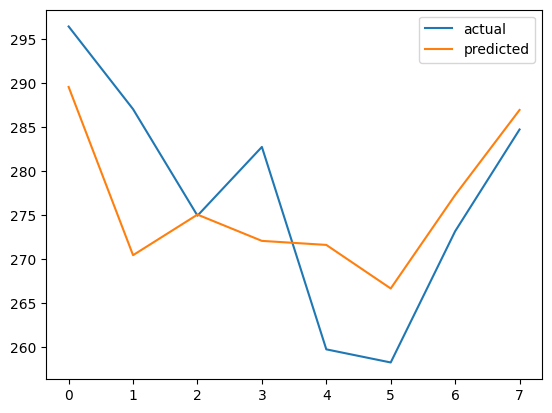

In [49]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

In [50]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6257
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5722
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5244
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4804
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4388
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3986
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3588
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3205
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2831
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2505
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2209
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1949
Epoch 13/100
1/1 [==============================] - 0s 

### Predictions

In [52]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 1s 502ms/step


In [53]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [54]:
comparison

,actual,predicted
0,296.399994,290.290100
1,287.019989,271.469299
2,274.929993,278.499786
3,282.730011,271.857330
4,259.760010,273.794403
5,258.269989,271.156677
6,273.160004,275.263214
7,284.709991,284.782288


In [55]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [56]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,136.450894
0,Simple NN,83.527727
0,Simple RNN with more layers,97.196626


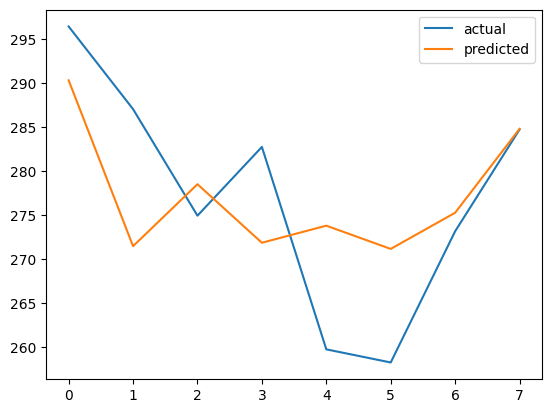

In [57]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [58]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8411
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8222
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8036
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7853
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7674
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7329
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7163
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7000
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6841
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6686
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6535
Epoch 13/100
1/1 [==============================] - 0s

### Predictions

In [60]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 369ms/step


In [61]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [62]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [63]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,136.450894
0,Simple NN,83.527727
0,Simple RNN with more layers,97.196626
0,LSTM RNN,76.696757


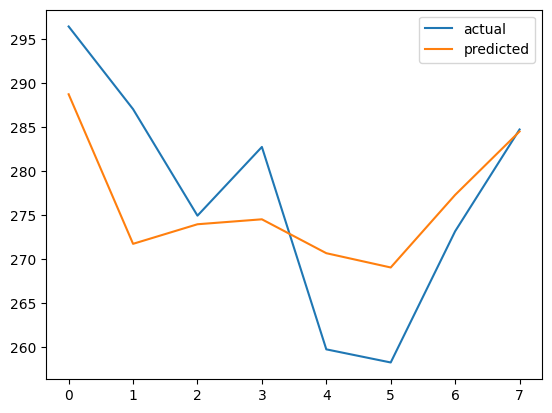

In [64]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [65]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [66]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.9156
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8748
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8362
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.7995
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7644
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7308
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6983
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6670
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6367
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6073
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5790
Epoch 12/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5518
Epoch 13/100
1/1 [==============================] -

### Predictions

In [67]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 2s 2s/step


In [68]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [69]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [70]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,136.450894
0,Simple NN,83.527727
0,Simple RNN with more layers,97.196626
0,LSTM RNN,76.696757
0,LSTM RNN with more layers,124.907591


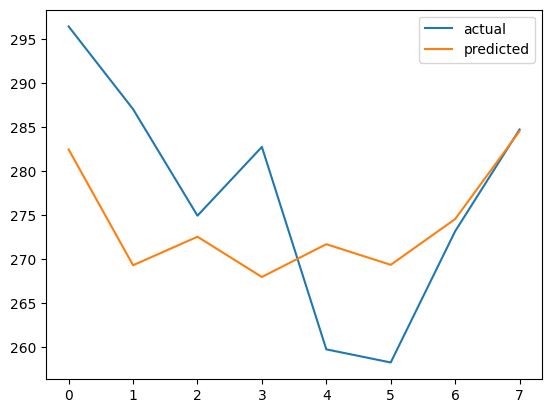

In [71]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [72]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.9288
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.8443
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7848
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.7337
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6877
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6475
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6089
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5716
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5368
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5040
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4728
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4432
Epoch 13/100
1/1 [==============================] -

### Predictions

In [74]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 618ms/step


In [75]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [76]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [77]:
performance = pd.concat([performance,pd.DataFrame({'model': 'GRU with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,136.450894
0,Simple NN,83.527727
0,Simple RNN with more layers,97.196626
0,LSTM RNN,76.696757
0,LSTM RNN with more layers,124.907591
0,GRU with more layers,78.148928


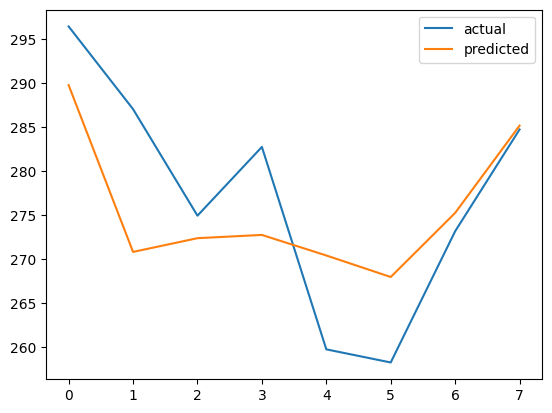

In [78]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

In [79]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [80]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.0326
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.9786
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.9258
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.8766
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.8294
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7846
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7439
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7058
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6697
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6355
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6029
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5721
Epoch 13/100
1/1 [==============================] -

### Predictions

In [81]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 647ms/step


In [82]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [83]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [84]:
performance.sort_values(by='MSE')

,model,MSE
0,LSTM RNN,76.696757
0,GRU with more layers,78.148928
0,Simple NN,83.527727
0,Simple RNN with more layers,97.196626
0,LSTM RNN with more layers,124.907591
0,Normal NN,136.450894


## Conclusion


The Normal NN achieves superior prediction accuracy. The MSE values of models with additional layers (Deep RNN, Deep GRU, and Deep LSTM) are greater than those with fewer layers (RNN, GRU with one layer, and LSTM with one layer). This implies that increasing the number of layers may not always improve predicted accuracy and may even contribute to overfitting, when the model becomes overly complicated and closely resembles the training set, producing subpar results when applied to new data.

In conclusion, the findings show that the Normal NN model is the most effective solution for this particular issue and a sizable advantage over other models. This emphasizes how crucial it is to choose the right model architecture based on the particular needs and data properties of the problem in order to obtain the greatest performance.